In [8]:
# Dependencies
import pandas as pd
import os
from pprint import pprint
import requests
import json
import sys
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import sem

# Set the seed so our data is reproducible
random.seed(42)

In [3]:
#Made edits in excel, pulling back in
clean_hospital= pd.read_csv("Cleaned_Hospitals_v7.csv")
clean_hospital = clean_hospital.drop(columns=['Unnamed: 0'])
clean_hospital

,Hospital name,City,County,Acute Care Beds,YearFounded,Affiliation,Notes,Place ID,Hospital Latitude,Hospital Longtitude,Street Address,State,Hospital Zip Code,Full Address,City Zip Code,City Latitude,City Longtitude,Median Income,Population,Joined
0,AdventHealth Gordon,Calhoun,Gordon County,69,NaN,AdventHealth,Formerly Gordon Hospital,ChIJfVjpjer9X4gRGK7NwGG_tbg,34.510205,-84.926304,1035 Red Bud Road Northeast,Georgia,30701.0,"1035 Red Bud Rd NE, Calhoun, GA 30701, USA",30702.0,34.487833,-84.850071,24110,40820,False
1,AdventHealth Murray,Chatsworth,Murray County,29,NaN,AdventHealth,Formerly Murray Medical Center,ChIJ-U0scjndX4gRG-FoXnNaHI4,34.779956,-84.783038,707 Old Dalton Ellijay Road,Georgia,30705.0,"707 Old Dalton Ellijay Rd, Chatsworth, GA 3070...",30705.0,34.753129,-84.775020,24457,33460,False
2,Archbold Memorial Hospital,Thomasville,Thomas County,264,1925,Archbold,NaN,ChIJsxblg8q17YgR8XXHSBDuObQ,30.825169,-83.972128,915 Gordon Avenue,Georgia,31792.0,"915 Gordon Ave, Thomasville, GA 31792, USA",31776.5,30.862504,-83.928812,22498,20703,False
3,Archbold - Brooks County Hospital,Quitman,Brooks County,25,NaN,Archbold,NaN,ChIJiyuklBp_7ogRmoGX5XNztMM,30.795039,-83.559146,903 North Court Street,Georgia,31643.0,"903 N Court St, Quitman, GA 31643, USA",31643.0,30.783639,-83.553430,24644,9062,False
4,Archbold - Mitchell County Hospital,Camilla,Mitchell County,25,NaN,Archbold,NaN,ChIJswuXyhic7YgRuk38qsPrYt4,31.229773,-84.205317,90 East Stephens Street,Georgia,31730.0,"90 E Stephens St, Camilla, GA 31730, USA",31730.0,31.209854,-84.236670,21584,8419,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,NaN,Wrens,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30833.0,33.200325,-82.376250,18634,3065,True
613,NaN,Wrightsville,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31096.0,32.717320,-82.689260,20232,7046,True
614,NaN,Yatesville,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31097.0,32.912207,-84.148120,27000,1656,True
615,NaN,Young Harris,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30582.0,34.954638,-83.864840,15867,5038,True


In [4]:
hospital_data = clean_hospital[['Hospital name', 'City', 'Acute Care Beds', 'Population']]
hospital_sum = hospital_data.groupby('City').sum()
hospital_sum = hospital_sum.reset_index()
hospital_sum

,City,Acute Care Beds,Population
0,Abbeville,0,4563
1,Acworth,0,49841
2,Adairsville,0,16138
3,Adel,60,10836
4,Adrian,0,3071
...,...,...,...
587,Wrens,0,3065
588,Wrightsville,0,7046
589,Yatesville,0,1656
590,Young Harris,0,5038


In [ ]:
hospital_bed = hospital_sum.loc[(hospital_sum['Acute Care Beds'] > 0)]
hospital_bed
plt.figure(figsize=(18,10))
plt.bar(hospital_bed['City'],hospital_bed['Acute Care Beds'], color="blue")
plt.xticks(hospital_bed['City'], rotation='vertical')
plt.title('Number of Hospital Beds per City (GA)')
plt.xlabel('Cities(GA)')
plt.ylabel('No. of Beds')
plt.xlim(-0.5,len(hospital_bed['City']))

plt.savefig("Hospital_Beds_per_City.png")

plt.show()

In [25]:
hospital_bed = hospital_sum.loc[(hospital_sum['Acute Care Beds'] > 0)]
sorted_hospital_bed = hospital_bed.sort_values(by=['Acute Care Beds'])
top_2_data = sorted_hospital_bed.tail(2)
print(top_2_data)
last_2_data = sorted_hospital_bed.head(2)
print(last_2_data)
final_4_data = top_2_data.append(last_2_data, ignore_index=True)
final_4_data

       City  Acute Care Beds  Population
28  Augusta             1103      131400
26  Atlanta             5124      336947
           City  Acute Care Beds  Population
353  Monticello               17        9071
90    Cedartown               18       23814


,City,Acute Care Beds,Population
0,Augusta,1103,131400
1,Atlanta,5124,336947
2,Monticello,17,9071
3,Cedartown,18,23814


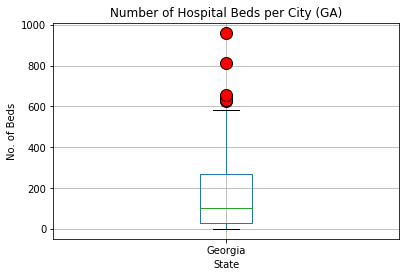

In [5]:
# Generate a box plot of hospital data
orange_out = dict(markerfacecolor='red',markersize=12)

#Make Box Plot
clean_hospital.boxplot(column=["Acute Care Beds"],by="State",flierprops=orange_out)

plt.title("Number of Hospital Beds per City (GA)")
plt.suptitle("")
plt.ylabel("No. of Beds")
plt.show()

In [6]:
clean_hospital['Acute Care Beds'] = clean_hospital['Acute Care Beds'].replace(to_replace='nan',value="0",regex=True)
clean_hospital["Beds per 1000 people"] = clean_hospital["Population"]/clean_hospital["Acute Care Beds"]
clean_hospital['Beds per 1000 people'].replace(np.inf, 0, inplace=True)

  
clean_hospital


,Hospital name,City,County,Acute Care Beds,YearFounded,Affiliation,Notes,Place ID,Hospital Latitude,Hospital Longtitude,...,State,Hospital Zip Code,Full Address,City Zip Code,City Latitude,City Longtitude,Median Income,Population,Joined,Beds per 1000 people
0,AdventHealth Gordon,Calhoun,Gordon County,69,NaN,AdventHealth,Formerly Gordon Hospital,ChIJfVjpjer9X4gRGK7NwGG_tbg,34.510205,-84.926304,...,Georgia,30701.0,"1035 Red Bud Rd NE, Calhoun, GA 30701, USA",30702.0,34.487833,-84.850071,24110,40820,False,591.594203
1,AdventHealth Murray,Chatsworth,Murray County,29,NaN,AdventHealth,Formerly Murray Medical Center,ChIJ-U0scjndX4gRG-FoXnNaHI4,34.779956,-84.783038,...,Georgia,30705.0,"707 Old Dalton Ellijay Rd, Chatsworth, GA 3070...",30705.0,34.753129,-84.775020,24457,33460,False,1153.793103
2,Archbold Memorial Hospital,Thomasville,Thomas County,264,1925,Archbold,NaN,ChIJsxblg8q17YgR8XXHSBDuObQ,30.825169,-83.972128,...,Georgia,31792.0,"915 Gordon Ave, Thomasville, GA 31792, USA",31776.5,30.862504,-83.928812,22498,20703,False,78.420455
3,Archbold - Brooks County Hospital,Quitman,Brooks County,25,NaN,Archbold,NaN,ChIJiyuklBp_7ogRmoGX5XNztMM,30.795039,-83.559146,...,Georgia,31643.0,"903 N Court St, Quitman, GA 31643, USA",31643.0,30.783639,-83.553430,24644,9062,False,362.480000
4,Archbold - Mitchell County Hospital,Camilla,Mitchell County,25,NaN,Archbold,NaN,ChIJswuXyhic7YgRuk38qsPrYt4,31.229773,-84.205317,...,Georgia,31730.0,"90 E Stephens St, Camilla, GA 31730, USA",31730.0,31.209854,-84.236670,21584,8419,False,336.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,NaN,Wrens,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30833.0,33.200325,-82.376250,18634,3065,True,0.000000
613,NaN,Wrightsville,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31096.0,32.717320,-82.689260,20232,7046,True,0.000000
614,NaN,Yatesville,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31097.0,32.912207,-84.148120,27000,1656,True,0.000000
615,NaN,Young Harris,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30582.0,34.954638,-83.864840,15867,5038,True,0.000000


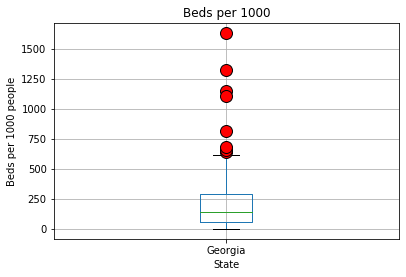

In [7]:
# Generate a box plot of beds per 1000 people
orange_out = dict(markerfacecolor='red',markersize=12)

#Make Box Plot
clean_hospital.boxplot(column=["Beds per 1000 people"],by="State",flierprops=orange_out)

plt.title("Beds per 1000")
plt.suptitle("")
plt.ylabel("Beds per 1000 people")
plt.show()

The mean of Hospital Beds is: 36.16
The standard deviation of Hospital Beds is: 113.24


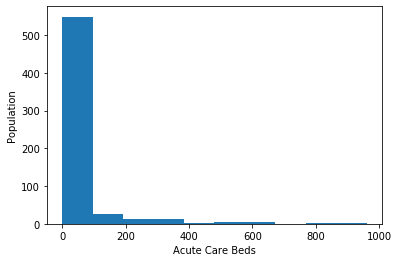

In [18]:
Acute_Care_Beds = clean_hospital["Acute Care Beds"]
print(f"The mean of Hospital Beds is: {round(Acute_Care_Beds.mean(),2)}")
print(f"The standard deviation of Hospital Beds is: {round(Acute_Care_Beds.std(),2)}")
plt.hist(clean_hospital["Acute Care Beds"])
plt.xlabel("Acute Care Beds")
plt.ylabel("Population")
plt.savefig("Charts\Histogram")
plt.show()